In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
# To check recent matplotlib compatibility
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
                    
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')     

In [3]:
# Importing training data to pandas dataframe

df=pd.read_csv('cs-training.csv')
print(df.shape)

dfy=df.iloc[:,1:2]
df=df.iloc[:,2:] 
df.fillna(df.mean(),inplace=True)
X=df.values
y=dfy.values
df.head(10)

(150000, 12)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.000000
1,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.000000
2,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.000000
3,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.000000
4,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.000000
5,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.000000
6,0.305682,57,0,5710.000000,6670.221237,8,0,3,0,0.000000
7,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.000000
8,0.116951,27,0,46.000000,6670.221237,2,0,0,0,0.757222
9,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.000000


In [4]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=1, stratify=y)



In [5]:
# Dealing with class imbalance (Chp6, Pg215)
from sklearn.utils import resample

print('Number of class 1 examples before:', 
      X_train[y_train == 1].shape)



Number of class 1 examples before: (8021, 10)


In [6]:
#Upsample
X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', 
      X_upsampled.shape)


Number of class 1 examples after: (111979, 10)


In [7]:
X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal)*100

50.0

In [8]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_bal)
X_test_std = sc.transform(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [9]:
# Decompose the covariance matrix into its eigenvectors and eigenvalues
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' %eigen_vals)


Eigenvalues 
[3.04779897 1.59216862 0.00549741 0.01087389 0.50932444 1.1801967
 1.03004378 0.97528092 0.90529157 0.74356835]


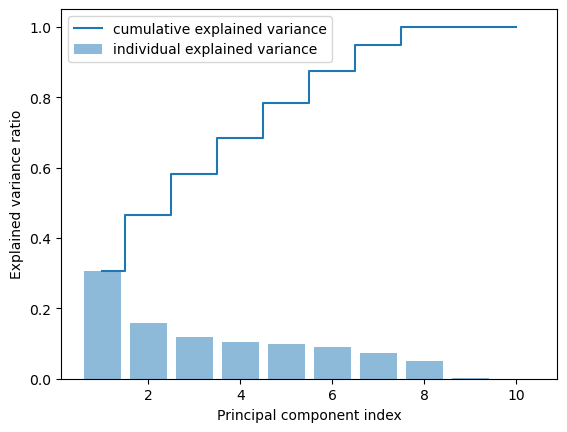

In [10]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
          sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,11), var_exp, alpha=0.5, align='center',
       label='individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


In [12]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.00188056 -0.00606272]
 [-0.08545423 -0.29997163]
 [ 0.5633422  -0.12545929]
 [-0.02816977 -0.24149693]
 [-0.03399316 -0.27615373]
 [-0.14979415 -0.59807255]
 [ 0.56585538 -0.10489271]
 [-0.10293902 -0.61311957]
 [ 0.56535335 -0.11576665]
 [-0.02321793 -0.04059301]]


In [13]:
X_train_std[0].dot(w)
X_train_pca = X_train_std[0].dot(w)

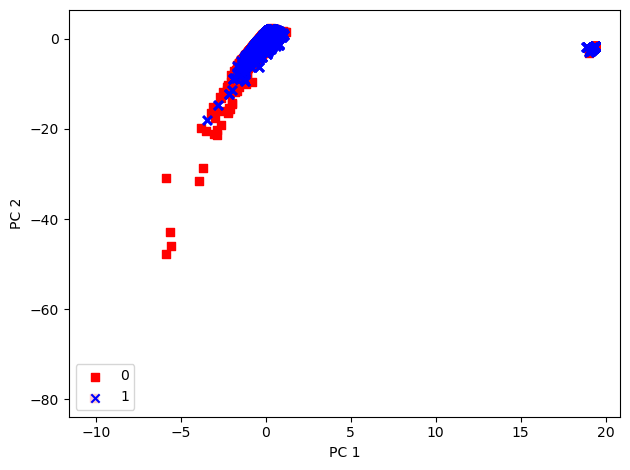

In [14]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_bal == l, 0], 
                X_train_pca[y_bal == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13556\1078130549.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


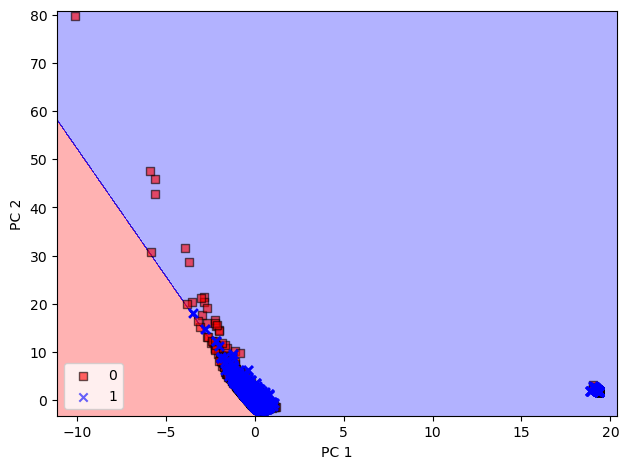

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_bal)

plot_decision_regions(X_train_pca, y_bal, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [16]:
X_train_pca[y_bal == l]

array([[ 0.54390576, -1.22907647],
       [ 0.56904516, -1.18809934],
       [-0.0267312 , -0.81805007],
       ...,
       [ 0.23478133, -1.74040178],
       [-0.28319277,  0.39185209],
       [ 0.42690566, -1.88854586]])

In [17]:
# Combining transformers and estimators in a pipeline (Chp6, Pg187)
# Chain StandardScalar, PCA, and Logistic Regression objects in a pipeline
# Logistic regression grid search

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(), 
                        PCA(n_components=3), 
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_bal, y_bal)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' %pipe_lr.score(X_test, y_test))

Test Accuracy: 0.774


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [18]:
from sklearn.model_selection import GridSearchCV

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]
gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_bal, y_bal)
print(gs.best_score_)
print(gs.best_params_)


0.7127318689586178
{'logisticregression__C': 1000.0}


In [19]:
#K-fold cross-validation (Chp6, pg191)
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=5).split(X_bal, y_bal)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_bal[train], y_bal[train])
    score = pipe_lr.score(X_bal[test], y_bal[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_bal[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold:  1, Class dist.: [89583 89583], Acc: 0.710
Fold:  2, Class dist.: [89583 89583], Acc: 0.708
Fold:  3, Class dist.: [89583 89583], Acc: 0.716
Fold:  4, Class dist.: [89583 89584], Acc: 0.714
Fold:  5, Class dist.: [89584 89583], Acc: 0.715

CV accuracy: 0.713 +/- 0.003


In [20]:
# Decision tree grid search

from sklearn.tree import DecisionTreeClassifier
pipe_dt = make_pipeline(StandardScaler(), 
                        PCA(n_components=3), 
                        DecisionTreeClassifier(random_state=1))
pipe_dt.fit(X_bal, y_bal)
y_pred = pipe_dt.predict(X_test)
print('Test Accuracy: %.3f' %pipe_dt.score(X_test, y_test))

Test Accuracy: 0.898


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [21]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'decisiontreeclassifier__max_depth': param_range,'decisiontreeclassifier__criterion': ['entropy','gini']}]

gs = GridSearchCV(estimator=pipe_dt, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_bal, y_bal)
print(gs.best_score_)
print(gs.best_params_)

0.9678466516486651
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 100.0}


In [22]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=5).split(X_bal, y_bal)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_dt.fit(X_bal[train], y_bal[train])
    score = pipe_dt.score(X_bal[test], y_bal[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_bal[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [89583 89583], Acc: 0.967
Fold:  2, Class dist.: [89583 89583], Acc: 0.968
Fold:  3, Class dist.: [89583 89583], Acc: 0.968
Fold:  4, Class dist.: [89583 89584], Acc: 0.968
Fold:  5, Class dist.: [89584 89583], Acc: 0.968

CV accuracy: 0.968 +/- 0.000


In [23]:
#SVC grid search
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), 
                        PCA(n_components=3), 
                         SVC(random_state=1))
pipe_svc.fit(X_bal, y_bal)
y_pred = pipe_svc.predict(X_test)
print('Test Accuracy: %.3f' %pipe_svc.score(X_test, y_test))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Test Accuracy: 0.839


In [ ]:
# Takes too long to run SVC
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_range = [1.0, 10.0, 100.0]

param_grid = [{'svc__C': param_range}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(X_bal, y_bal)
print(gs.best_score_)
print(gs.best_params_)



In [ ]:

import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=5).split(X_bal, y_bal)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svc.fit(X_bal[train], y_bal[train])
    score = pipe_svc.score(X_bal[test], y_bal[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_bal[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))